In [34]:
import numpy as np
from collections import Counter
import random

true_coverage_list = np.arange(0, 0.3, 0.005)#[0.008, 0.015, 0.0284, 0.0535, 0.101, 0.1902, 0.3585, 0.6757]
read_error_rate = 0.05
num_kmers = 2000000 # for E. coli
c = 20
num_simulations = 1000
k = 31



In [38]:
sensitivity_list = []

for coverage in true_coverage_list:
    # Find effective coverage
    effective_coverage = coverage * ((1-read_error_rate) ** k)
    num_reported = 0
    total_num = 0
    for _ in range(num_simulations):
        total_num += 1

        # Sample a number of k-mers
        kmer_samples = np.random.choice(np.arange(int(num_kmers / c)), int(effective_coverage * num_kmers / c))
        kmer_counter = Counter(kmer_samples)
        
        # Find the containment index
        containment_index = len(kmer_counter) / int(num_kmers / c) 
        N1 = list(kmer_counter.values()).count(1)
        N2 = list(kmer_counter.values()).count(2)
        if N1 < 3 or N2 < 3:
            estimated_lambda = 1
        else:
            estimated_lambda = N2 / N1 * 2 
        estimated_ANI = (containment_index / (1-np.exp(-estimated_lambda))) ** (1/k)
        #print(effective_coverage, estimated_lambda, estimated_ANI)
        if estimated_ANI > 0.95:
            num_reported += 1
    
    sensitivity_list.append(num_reported / total_num)

    #print(effective_coverage, num_reported / total_num, total_num)



In [39]:
default_sensitivity = sensitivity_list

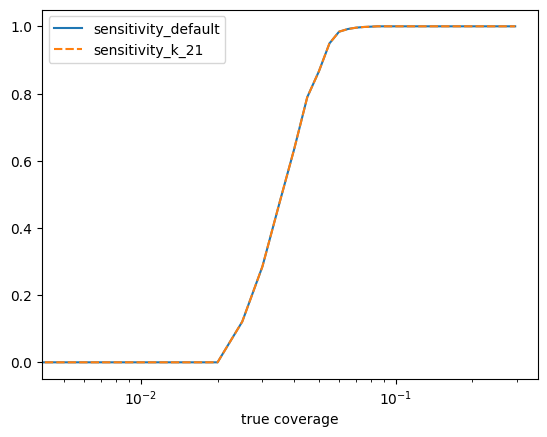

In [41]:
import seaborn
import pandas as pd
import matplotlib.pyplot as plt
res_df = pd.DataFrame({"true coverage": true_coverage_list, "sensitivity_default": default_sensitivity, "sensitivity_k_21": sensitivity_list})
seaborn.lineplot(res_df.set_index("true coverage"))
plt.xscale("log")